In [1]:
import pandas as pd

In [2]:
apps_with_duplicates = pd.read_csv('apps.csv')
apps_with_duplicates.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.size)

# Have a look at a random sample of 5 entries
n = 5
apps.sample(n)

Total number of apps in the dataset =  125567


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
991,ColorFul - Adult Coloring Book,ENTERTAINMENT,4.6,50725,19M,"5,000,000+",Free,0,Everyone,Entertainment,"May 25, 2018",1.0.64,4.0.3 and up
5984,BC Wildflowers,FAMILY,4.4,7,81M,"1,000+",Free,0,Everyone,Education,"July 10, 2017",3.5,4.1 and up
4790,PLAYBULB X,LIFESTYLE,2.9,2160,15M,"100,000+",Free,0,Everyone,Lifestyle,"June 25, 2018",1.6.5,4.3 and up
3189,Cheapflights – Flight Search,TRAVEL_AND_LOCAL,4.4,47780,19M,"5,000,000+",Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
10806,SnakeBite911 FR,MEDICAL,NaN,1,42M,500+,Free,0,Everyone,Medical,"October 9, 2017",1.2,4.1 and up


In [4]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

In [5]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)
print(num_apps_in_category)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


In [6]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


TypeError: can't multiply sequence by non-int of type 'float'

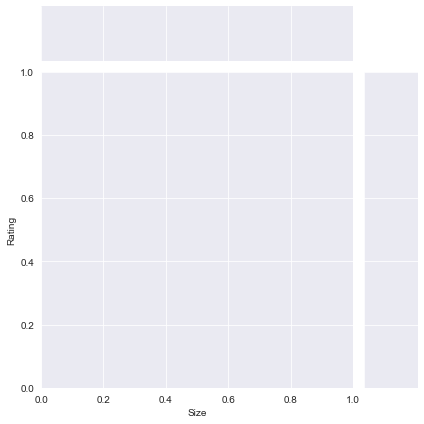

In [9]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps[apps['Price'] > 0]

# Plot price vs. rating
sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'], data = paid_apps)


,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


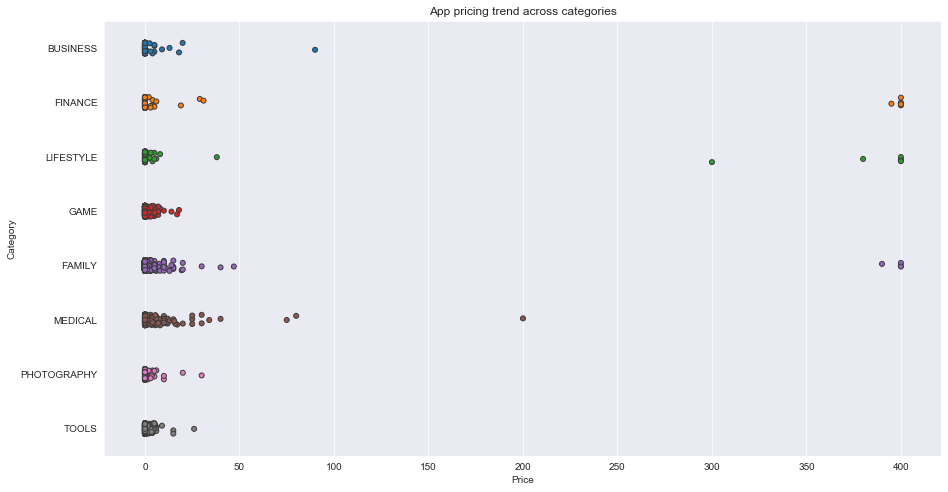

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps['Price'] > 200][['Category', 'App', 'Price']]
apps_above_200

In [11]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]
apps_under_100

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,10000000,Free,0.0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,50000000,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,Varies with device,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,5000000,Free,0.0,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,1000000,Free,0.0,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

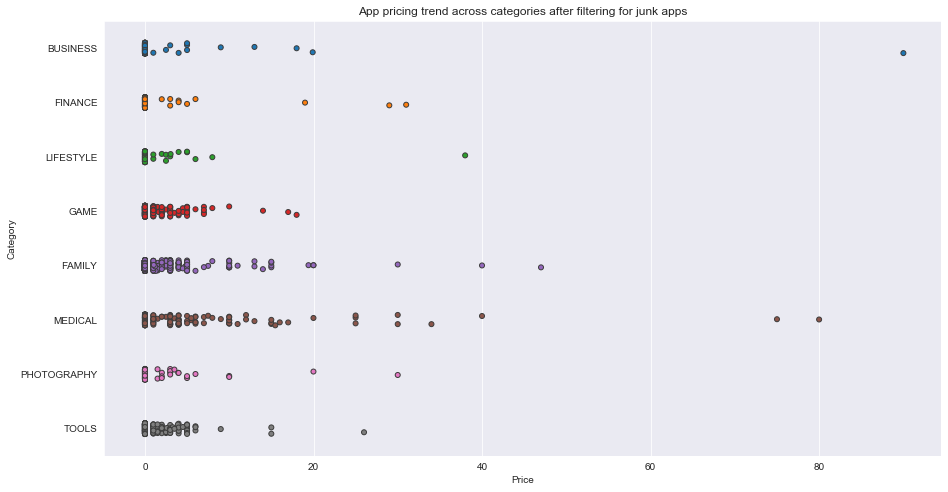

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [13]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [14]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

FileNotFoundError: [Errno 2] File datasets/user_reviews.csv does not exist: 'datasets/user_reviews.csv'